In [ ]:
#I am answering the question

In [1]:
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
df = pd.read_excel(r"C:\Users\arnie\Coding\Ds311_Group_5_Repo\Q1\fifa_world_cup_cleaned.xlsx", engine='openpyxl')

df.head()


,1993-08-08 00:00:00,Bolivia,Uruguay,South America,South America.1,59,22,0,0.1,3,1,FIFA World Cup qualification,La Paz,Bolivia.1,False.2,No,Win
0,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,MaceiÃ³,Brazil,False,No,Draw
1,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
2,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
3,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,AsunciÃ³n,Paraguay,False,No,Lose
4,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,1,FIFA World Cup qualification,Lima,Peru,False,No,Lose


In [29]:
df.columns = [
    "date", "home_team", "away_team", "home_region", "away_region",
    "home_rank", "away_rank", "neutral", "importance", "home_score",
    "away_score", "tournament", "city", "venue", "extra_col1", "extra_col2", "result"
]
#home teams 
home_df = df[["home_team", "away_team", "home_score", "away_score"]].copy()
home_df.columns = ["team", "opponent", "goals_for", "goals_against"]
#away teams
away_df = df[["away_team", "home_team", "away_score", "home_score"]].copy()
away_df.columns = ["team", "opponent", "goals_for", "goals_against"]

team_stats = pd.concat([home_df, away_df], ignore_index=True)

#summary
team_summary = team_stats.groupby("team").agg(
    matches_played=("goals_for", "count"),
    avg_goals_scored=("goals_for", "mean"),
    avg_goals_conceded=("goals_against", "mean")
).reset_index()


In [32]:
top_offense = team_summary.sort_values(by="avg_goals_scored", ascending=False).head(10)
top_offense

,team,matches_played,avg_goals_scored,avg_goals_conceded
75,Germany,390,2.243590,1.002564
174,Spain,354,2.206215,0.700565
27,Brazil,433,2.203233,0.692841
135,New Caledonia,65,2.200000,1.169231
134,Netherlands,340,2.058824,0.844118
11,Australia,307,2.048860,0.947883
170,Solomon Islands,113,2.017699,1.849558
152,Portugal,336,1.988095,0.797619
69,Fiji,109,1.972477,1.339450
89,IR Iran,366,1.948087,0.765027


In [33]:
top_defense = team_summary.sort_values(by="avg_goals_conceded").head(10)
top_defense


,team,matches_played,avg_goals_scored,avg_goals_conceded
27,Brazil,433,2.203233,0.692841
174,Spain,354,2.206215,0.700565
71,France,370,1.810811,0.718919
129,Morocco,323,1.535604,0.743034
62,England,334,1.886228,0.751497
89,IR Iran,366,1.948087,0.765027
152,Portugal,336,1.988095,0.797619
95,Italy,351,1.589744,0.806268
134,Netherlands,340,2.058824,0.844118
163,Senegal,325,1.390769,0.889231


In [34]:
# i want to build some kind of graph but i will try to work on that another time 

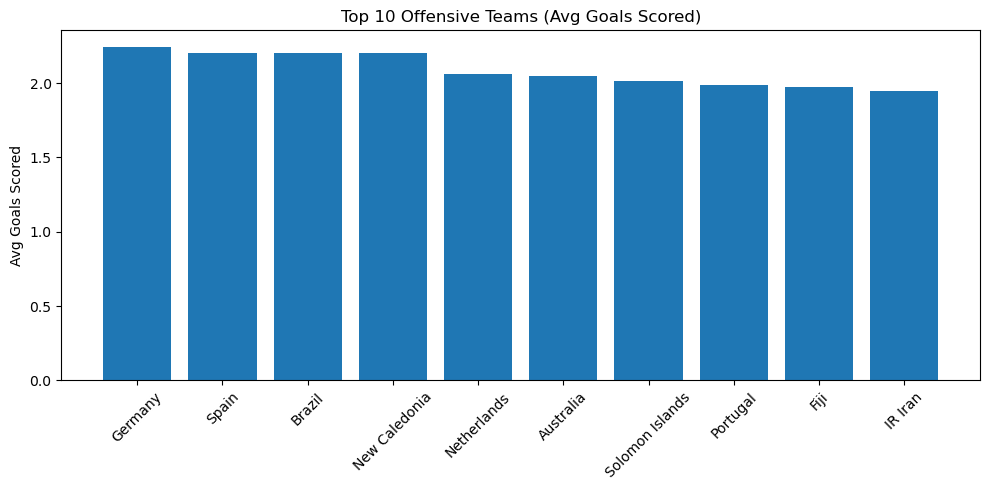

In [35]:
# Offensive Teams scoering
plt.figure(figsize=(10,5))
plt.bar(top_offense['team'], top_offense['avg_goals_scored'])
plt.title('Top 10 Offensive Teams (Avg Goals Scored)')
plt.ylabel('Avg Goals Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


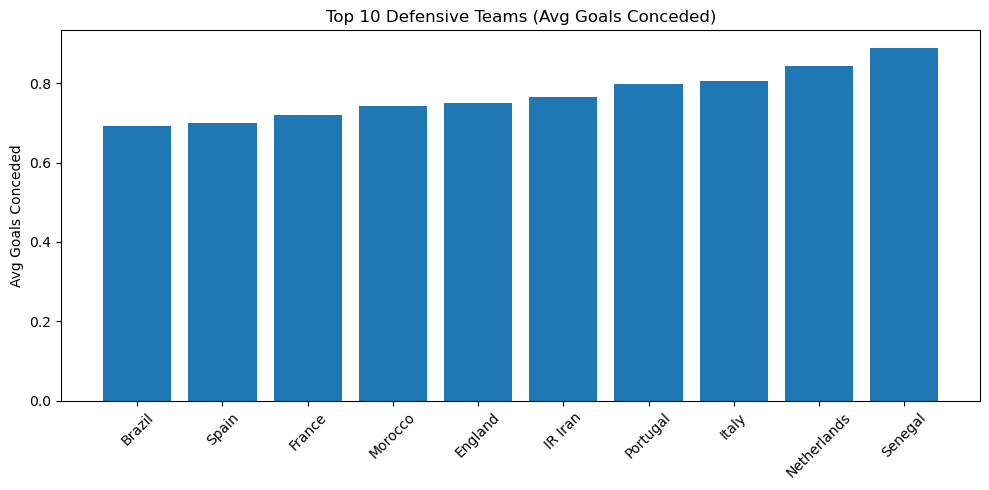

In [36]:
top_defense = team_summary.sort_values(by="avg_goals_conceded").head(10)

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_defense["team"], top_defense["avg_goals_conceded"])
plt.title("Top 10 Defensive Teams (Avg Goals Conceded)")
plt.ylabel("Avg Goals Conceded")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Finish up a list showing who won in order 